In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
covid19_confirmed = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
covid19_deaths = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
covid19_recovered = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")

In [3]:
covid19_confirmed.isnull().sum()

Province/State    195
Country/Region      0
Lat                 2
Long                2
1/22/20             0
                 ... 
4/28/22             0
4/29/22             0
4/30/22             0
5/1/22              0
5/2/22              0
Length: 836, dtype: int64

In [4]:
covid19_confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/23/22,4/24/22,4/25/22,4/26/22,4/27/22,4/28/22,4/29/22,4/30/22,5/1/22,5/2/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,178648,178689,178745,178769,178809,178850,178873,178879,178899,178901
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,274791,274828,274828,274862,274929,275002,275055,275107,275167,275177
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,265761,265767,265771,265772,265773,265776,265779,265780,265782,265782
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,41013,41013,41013,41013,41013,41349,41349,41349,41349,41349
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,99287,99287,99287,99287,99287,99287,99287,99287,99287,99287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,656876,656876,656876,657060,657060,657060,657060,657060,657060,657060
280,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
281,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11818,11818,11818,11818,11818,11818,11818,11818,11818,11819
282,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,318984,318984,319316,319431,319431,319594,319594,319594,319733,319755


In [5]:
#Renaming columns
covid19_confirmed.rename({'Province/State' :'State', 'Country/Region' : 'Country'}, axis = 1, inplace = True)
covid19_deaths.rename({'Province/State' :'State', 'Country/Region' : 'Country'}, axis = 1, inplace = True)
covid19_recovered.rename({'Province/State' :'State', 'Country/Region' : 'Country'}, axis = 1, inplace = True)

**EDA**

In [ ]:
covid_country = covid19_confirmed.drop(['State', 'Lat', 'Long'], axis = 1)

In [ ]:
covid_country

,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,...,3/4/21,3/5/21,3/6/21,3/7/21,3/8/21,3/9/21,3/10/21,3/11/21,3/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21,3/18/21,3/19/21,3/20/21,3/21/21,3/22/21,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21,4/10/21,4/11/21,4/12/21
0,Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,55775,55827,55840,55847,55876,55876,55894,55917,55959,55959,55985,55985,55995,56016,56044,56069,56093,56103,56153,56177,56192,56226,56254,56290,56294,56322,56384,56454,56517,56572,56595,56676,56717,56779,56873,56943,57019,57144,57160,57242
1,Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,110521,111301,112078,112897,113580,114209,114840,115442,116123,116821,117474,118017,118492,118938,119528,120022,120541,121200,121544,121847,122295,122767,123216,123641,124134,124419,124723,125157,125506,125842,126183,126531,126795,126936,127192,127509,127795,128155,128393,128518
2,Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,...,113761,113948,114104,114234,114382,114543,114681,114851,115008,115143,115265,115410,115540,115688,115842,115970,116066,116157,116255,116349,116438,116543,116657,116750,116836,116946,117061,117192,117304,117429,117524,117622,117739,117879,118004,118116,118251,118378,118516,118645
3,Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,10976,10998,11019,11042,11069,11089,11130,11130,11199,11228,11266,11289,11319,11360,11393,11431,11481,11517,11545,11591,11638,11687,11732,11809,11850,11888,11944,12010,12053,12115,12174,12231,12286,12328,12363,12409,12456,12497,12545,12581
4,Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,20981,21026,21055,21086,21108,21114,21161,21205,21265,21323,21380,21407,21446,21489,21558,21642,21696,21733,21757,21774,21836,21914,21961,22031,22063,22132,22182,22311,22399,22467,22579,22631,22717,22885,23010,23108,23242,23331,23457,23549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,Vietnam,0,2,2,2,2,2,2,2,2,2,6,6,8,8,8,10,10,13,13,14,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,2488,2494,2501,2512,2524,2526,2529,2533,2550,2553,2554,2557,2560,2567,2570,2571,2572,2572,2575,2575,2576,2579,2586,2586,2591,2594,2594,2603,2617,2620,2626,2631,2637,2648,2659,2668,2683,2692,2693,2705
270,West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,191203,193029,194548,196812,198554,200382,202378,203669,205652,207436,209304,211602,213791,215984,218061,219912,221391,223638,225976,228044,230076,232038,233549,234748,236462,238248,240065,242353,244645,246893,248482,251288,253922,256461,259133,262017,264395,265897,268132,270856
271,Yemen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2375,2411,2444,2473,2545,2586,2627,2667,2729,2771,2836,2908,2969,3037,3126,3217,3278,3418,3516,3612,3703,3816,3900,3969,4033,4115,4247,4357,4531,4620,4697,4798,4881,4975,5047,5133,5233,5276,5357,5446
272,Zambia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,80687,81341,82011,82421,82655,82897,83333,83913,84240,84474,84797,84950,85240,85502,85889,86059,86273,86449,86535,86779,86993,87318,87583,87583,87872,88012,88199,88418,88549,88730,88800,88930,89009,89071,89386,89592,8978

In [ ]:
covid_country.head(15)

,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,...,3/4/21,3/5/21,3/6/21,3/7/21,3/8/21,3/9/21,3/10/21,3/11/21,3/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21,3/18/21,3/19/21,3/20/21,3/21/21,3/22/21,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21,4/10/21,4/11/21,4/12/21
0,Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,55775,55827,55840,55847,55876,55876,55894,55917,55959,55959,55985,55985,55995,56016,56044,56069,56093,56103,56153,56177,56192,56226,56254,56290,56294,56322,56384,56454,56517,56572,56595,56676,56717,56779,56873,56943,57019,57144,57160,57242
1,Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,110521,111301,112078,112897,113580,114209,114840,115442,116123,116821,117474,118017,118492,118938,119528,120022,120541,121200,121544,121847,122295,122767,123216,123641,124134,124419,124723,125157,125506,125842,126183,126531,126795,126936,127192,127509,127795,128155,128393,128518
2,Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,...,113761,113948,114104,114234,114382,114543,114681,114851,115008,115143,115265,115410,115540,115688,115842,115970,116066,116157,116255,116349,116438,116543,116657,116750,116836,116946,117061,117192,117304,117429,117524,117622,117739,117879,118004,118116,118251,118378,118516,118645
3,Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,10976,10998,11019,11042,11069,11089,11130,11130,11199,11228,11266,11289,11319,11360,11393,11431,11481,11517,11545,11591,11638,11687,11732,11809,11850,11888,11944,12010,12053,12115,12174,12231,12286,12328,12363,12409,12456,12497,12545,12581
4,Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,20981,21026,21055,21086,21108,21114,21161,21205,21265,21323,21380,21407,21446,21489,21558,21642,21696,21733,21757,21774,21836,21914,21961,22031,22063,22132,22182,22311,22399,22467,22579,22631,22717,22885,23010,23108,23242,23331,23457,23549
5,Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,813,813,813,848,848,862,882,882,945,962,963,963,992,992,1008,1011,1033,1033,1072,1080,1080,1103,1122,1122,1128,1136,1136,1136,1147,1152,1170,1170,1173,1173,1177,1180,1182,1197,1198,1198
6,Argentina,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2133963,2141854,2146714,2149636,2154694,2162001,2169694,2177898,2185747,2192025,2195722,2201886,2210121,2218425,2226753,2234913,2241739,2245771,2252172,2261577,2269877,2278115,2291051,2301389,2308597,2322611,2332765,2348821,2363251,2373153,2383537,2393492,2407159,2428029,2450068,2473751,2497881,2517300,2532562,2551999
7,Armenia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,173307,173749,174257,174679,175016,175198,175538,176286,177104,177899,178385,178702,179287,180141,181165,182056,183127,183713,184219,185020,186184,187441,188446,189540,190317,190741,191491,192639,193736,194852,196044,196634,197113,197873,198898,200129,201158,202167,202817,203327
8,Australia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,120,120,122,122,122,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123
9,Australia,0,0,0,0,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,...,5205,5207,5209,5210,5215,5220,5226,5234,5234,5237,5240,5242,5249,5251,5256,5259,5261,5266,5270,5273,5277,5278,5281,5281,5283,5288,5291,5296,5296,5299,5300,5303,5310,5316,5318,5320,5324,5330,5339,5344


In [ ]:
covid_country = covid_country.groupby(['Country']).sum()

In [ ]:
# Top 10 countries with updated covid cases 
covid_country.sort_values(by = covid_country.columns[-1], ascending = False).head(10)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,3/4/21,3/5/21,3/6/21,3/7/21,3/8/21,3/9/21,3/10/21,3/11/21,3/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21,3/18/21,3/19/21,3/20/21,3/21/21,3/22/21,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21,4/10/21,4/11/21,4/12/21
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
US,1,1,2,2,5,5,5,6,6,8,8,8,11,11,11,12,12,12,12,12,13,13,14,14,14,14,14,14,14,14,16,16,16,16,16,16,17,17,25,32,...,28898196,28964641,29022832,29063771,29108785,29166483,29224389,29286851,29348168,29401288,29439500,29496149,29550095,29609216,29669741,29731361,29786730,29820490,29872067,29925655,30012606,30080058,30157372,30220061,30263145,30332565,30393805,30460834,30539868,30609690,30672664,30707596,30785390,30847348,30922386,31002264,31084962,31151495,31197873,31268107
India,0,0,0,0,0,0,0,0,1,1,1,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,...,11173761,11192045,11210799,11229398,11244786,11262707,11285561,11308846,11333728,11359048,11385339,11409831,11438734,11474605,11514331,11555284,11599130,11646081,11686796,11734058,11787534,11846652,11908910,11971624,12039644,12095855,12149335,12221665,12303131,12392260,12485509,12589067,12686049,12801785,12928574,13060542,13205926,13358805,13527717,13689453
Brazil,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,2,...,10793732,10869227,10938836,11019344,11051665,11122429,11202305,11277717,11363380,11439558,11483370,11519609,11603535,11693838,11780820,11871390,11950459,11998233,12047526,12130019,12220011,12320169,12404414,12490362,12534688,12573615,12658109,12748747,12839844,12910082,12953597,12984956,13013601,13100580,13193205,13279857,13373174,13445006,13482023,13517808
France,0,0,2,3,3,3,4,5,5,5,6,6,6,6,6,6,6,11,11,11,11,11,11,11,12,12,12,12,12,12,12,12,12,12,14,18,38,57,100,130,...,3895430,3918937,3942243,3964078,3969612,3992755,4022429,4050558,4075735,4105527,4131874,4138345,4168411,4206912,4241973,4277171,4312510,4343097,4358910,4373607,4438999,4484659,4526530,4569164,4606185,4615295,4646014,4705068,4755779,4802457,4802545,4883174,4893971,4902025,4902985,5000155,5000314,5001685,5119585,5128140
Russia,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,...,4241970,4252876,4263785,4274263,4284408,4293750,4302726,4311893,4321588,4331396,4341381,4350728,4360033,4368943,4378656,4388268,4397816,4407031,4416226,4424595,4433364,4442492,4451565,4460348,4469327,4477916,4486078,4494234,4503291,4511973,4520879,4529576,4538101,4546307,4554481,4563026,4572053,4580633,4589209,4597400
United Kingdom,0,0,0,0,0,0,0,0,0,2,2,2,8,8,9,9,9,13,14,14,15,16,17,18,18,18,19,19,20,22,23,23,28,30,34,37,44,56,61,94,...,4213764,4219788,4225906,4231166,4235989,4241858,4247879,4254714,4261398,4267015,4271710,4276840,4282203,4287996,4294328,4299200,4304839,4310195,4315602,4321019,4326645,4332922,4339157,4343066,4347013,4351796,4355867,4359982,4364547,4367969,4371393,4373798,4376629,4379033,4381830,4384954,4380167,4382880,4384610,4388296
Turkey,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2746158,2757460,2769230,2780417,2793632,2807387,2821943,2835989,2850930,2866012,2879390,2894893,2911642,2930554,2950603,2971633,2992694,3013122,3035338,3061520,3091282,3120013,3149094,3179115,3208173,3240577,3277880,3317182,3357988,3400296,3445052,3487050,3529601,3579185,3633925,3689866,3745657,3798333,3849011,3903573
Italy,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,20,62,155,229,322,453,655,888,1128,1694,...,2999119,3023129,3046762,3067486,3081368,3101093,3123368,3149017,3175807,3201838,3223142,3238394,3258770,3

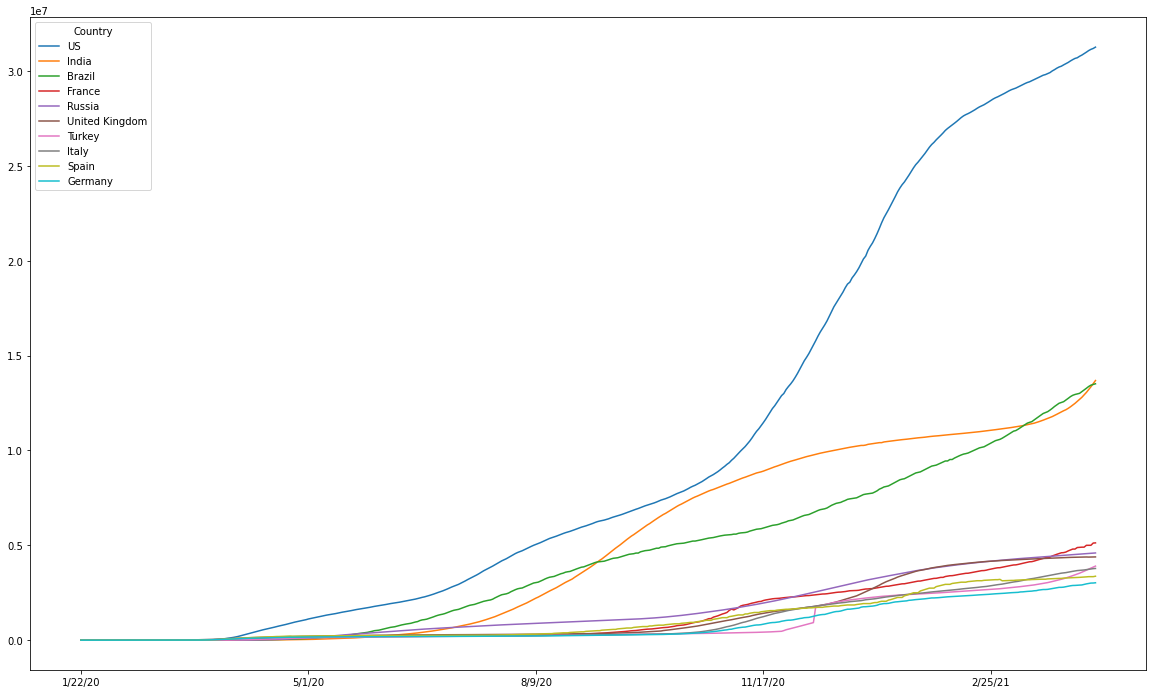

In [ ]:
covid_country.sort_values(by = covid_country.columns[-1], ascending=False).head(10).transpose().plot(figsize = (20,12))

In [ ]:
#plotly used for creating interactive plots
import cufflinks
from plotly.offline import iplot, init_notebook_mode
cufflinks.go_offline(connected = False)
init_notebook_mode(connected = False)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))

In [ ]:
configure_plotly_browser_state()
init_notebook_mode(connected = False)
covid_country.sort_values(by = covid_country.columns[-1], ascending=False).head(10).transpose().iplot(dimensions=(1300,750), width=2, title = "Total Confirmed Cases in Top 10 Country")

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
covid_country.diff()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,3/4/21,3/5/21,3/6/21,3/7/21,3/8/21,3/9/21,3/10/21,3/11/21,3/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21,3/18/21,3/19/21,3/20/21,3/21/21,3/22/21,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21,4/10/21,4/11/21,4/12/21
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,54746.0,55474.0,56238.0,57050.0,57704.0,58333.0,58946.0,59525.0,60164.0,60862.0,61489.0,62032.0,62497.0,62922.0,63484.0,63953.0,64448.0,65097.0,65391.0,65670.0,66103.0,66541.0,66962.0,67351.0,67840.0,68097.0,68339.0,68703.0,68989.0,69270.0,69588.0,69855.0,70078.0,70157.0,70319.0,70566.0,70776.0,71011.0,71233.0,71276.0
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,3240.0,2647.0,2026.0,1337.0,802.0,334.0,-159.0,-591.0,-1115.0,-1678.0,-2209.0,-2607.0,-2952.0,-3250.0,-3686.0,-4052.0,-4475.0,-5043.0,-5289.0,-5498.0,-5857.0,-6224.0,-6559.0,-6891.0,-7298.0,-7473.0,-7662.0,-7965.0,-8202.0,-8413.0,-8659.0,-8909.0,-9056.0,-9057.0,-9188.0,-9393.0,-9544.0,-9777.0,-9877.0,-9873.0
Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-102785.0,-102950.0,-103085.0,-103192.0,-103313.0,-103454.0,-103551.0,-103721.0,-103809.0,-103915.0,-103999.0,-104121.0,-104221.0,-104328.0,-104449.0,-104539.0,-104585.0,-104640.0,-104710.0,-104758.0,-104800.0,-104856.0,-104925.0,-104941.0,-104986.0,-105058.0,-105117.0,-105182.0,-105251.0,-105314.0,-105350.0,-105391.0,-105453.0,-105551.0,-105641.0,-105707.0,-105795.0,-105881.0,-105971.0,-106064.0
Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10005.0,10028.0,10036.0,10044.0,10039.0,10025.0,10031.0,10075.0,10066.0,10095.0,10114.0,10118.0,10127.0,10129.0,10165.0,10211.0,10215.0,10216.0,10212.0,10183.0,10198.0,10227.0,10229.0,10222.0,10213.0,10244.0,10238.0,10301.0,10346.0,10352.0,10405.0,10400.0,10431.0,10557.0,10647.0,10699.0,10786.0,10834.0,10912.0,10968.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,6.0,6.0,8.0,8.0,8.0,10.0,10.0,13.0,13.0,14.0,15.0,15.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,...,-138472.0,-138862.0,-139384.0,-139826.0,-140250.0,-140795.0,-140792.0,-141744.0,-142236.0,-142826.0,-142825.0,-143931.0,-144468.0,-145010.0,-145638.0,-146574.0,-147734.0,-148551.0,-149319.0,-149933.0,-150739.0,-151586.0,-152319.0,-153077.0,-154064.0,-155349.0,-156555.0,-157894.0,-159134.0,-160110.0,-161711.0,-163492.0,-164911.0,-166426.0,-167530.0,-168705.0,-169778.0,-171094.0,

In [ ]:
covid_country.loc['India'].diff()

1/22/20         NaN
1/23/20         0.0
1/24/20         0.0
1/25/20         0.0
1/26/20         0.0
             ...   
4/8/21     131968.0
4/9/21     145384.0
4/10/21    152879.0
4/11/21    168912.0
4/12/21    161736.0
Name: India, Length: 447, dtype: float64

In [ ]:
configure_plotly_browser_state()
init_notebook_mode(connected = False)
covid_country.loc['Greece'].diff().iplot(dimensions = (1300,750), width = 2, title = "Daily Covid Cases in Republic of Greece ")

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
### Covid world cases ###

In [ ]:
confirmed_world = covid19_confirmed.drop(columns = ['Lat', 'Long', 'State'])
confirmed_world = confirmed_world.groupby(['Country']).sum()

In [ ]:
deaths_world = covid19_deaths.drop(columns = ['Lat', 'Long', 'State'])
deaths_world = deaths_world.groupby(['Country']).sum()

In [ ]:
recovered_world = covid19_recovered.drop(columns = ['Lat', 'Long', 'State'])
recovered_world = recovered_world.groupby(['Country']).sum()

In [ ]:
df_world = pd.DataFrame(confirmed_world[:].sum(), columns = ['Confirmed Cases'])
df_world['Deaths'] = pd.DataFrame(deaths_world[:].sum())
df_world['Recovered'] = pd.DataFrame(recovered_world[:].sum())

In [ ]:
df_world

,Confirmed Cases,Deaths,Recovered
1/22/20,557,17,30
1/23/20,655,18,32
1/24/20,941,26,39
1/25/20,1433,42,42
1/26/20,2118,56,56
...,...,...,...
4/8/21,133943335,2901995,76113059
4/9/21,134691380,2915400,76508889
4/10/21,135355885,2927807,76891123
4/11/21,136046624,2936364,77419350


In [ ]:
df_world['Active'] = df_world['Confirmed Cases']-df_world['Recovered']

In [ ]:
configure_plotly_browser_state()
init_notebook_mode(connected = False)
df_world.iplot(dimensions = (1100,800), width = 2)

Output hidden; open in https://colab.research.google.com to view.

**LSTM Model**

In [ ]:
import keras
from keras.models import Sequential

# LSTM Model
from keras.layers import LSTM, Dense
from keras.layers import Dropout

In [ ]:
# Processing 
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
covid_data = df_world.reset_index()
covid_data

,index,Confirmed Cases,Deaths,Recovered,Active
0,1/22/20,557,17,30,527
1,1/23/20,655,18,32,623
2,1/24/20,941,26,39,902
3,1/25/20,1433,42,42,1391
4,1/26/20,2118,56,56,2062
...,...,...,...,...,...
442,4/8/21,133943335,2901995,76113059,57830276
443,4/9/21,134691380,2915400,76508889,58182491
444,4/10/21,135355885,2927807,76891123,58464762
445,4/11/21,136046624,2936364,77419350,58627274


In [ ]:
covid_data = covid_data.drop(['index', 'Deaths', 'Recovered', 'Active'], axis =1)

In [ ]:
covid_data

,Confirmed Cases
0,557
1,655
2,941
3,1433
4,2118
...,...
442,133943335
443,134691380
444,135355885
445,136046624


**Train test**

In [ ]:
# In time series we split data using index values
train_data = covid_data[0:len(covid_data)-10]
test_data = covid_data[0:len(covid_data)-10:]

**Data preprocessing**

In [ ]:
# MinMaxScaling 
from sklearn.preprocessing import MinMaxScaler
# All features are scaled in b/w 0 - 1
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(train_data)


MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

**LSTM Model**

In [ ]:
n_input = 10
n_features = 1
generator = TimeseriesGenerator(scaled_train_data, scaled_train_data, length = n_input, batch_size = 4)

In [ ]:
def build_model():
    lstm_model = Sequential()

    # layer - I
    lstm_model.add(LSTM(units = 64, return_sequences=True, input_shape = (n_input, n_features)))
    # Removing overfitting 
    lstm_model.add(Dropout(0.2))

    lstm_model.add(LSTM(units = 128, return_sequences=True))
    lstm_model.add(Dropout(0.2))

    lstm_model.add(LSTM(units = 128, return_sequences=True))
    lstm_model.add(Dropout(0.2))

    lstm_model.add(LSTM(units = 128, return_sequences=True))
    lstm_model.add(Dropout(0.2))

    # Regression
    lstm_model.add(LSTM(units = 1))

    lstm_model.compile(optimizer = 'Adam', loss = 'mean_squared_error', metrics=['mean_squared_error',
                                                                                 'mean_absolute_error'])
    return lstm_model

In [ ]:
model = build_model()

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 10, 64)            16896     
_________________________________________________________________
dropout_4 (Dropout)          (None, 10, 64)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 10, 128)           98816     
_________________________________________________________________
dropout_5 (Dropout)          (None, 10, 128)           0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 10, 128)           131584    
_________________________________________________________________
dropout_6 (Dropout)          (None, 10, 128)           0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 10, 128)          

In [ ]:
results = model.fit(generator, epochs = 100)

Epoch 1/100
107/107 [==============================] - 12s 35ms/step - loss: 0.0323 - mean_squared_error: 0.0323 - mean_absolute_error: 0.1228
Epoch 2/100
107/107 [==============================] - 4s 35ms/step - loss: 0.0078 - mean_squared_error: 0.0078 - mean_absolute_error: 0.0633
Epoch 3/100
107/107 [==============================] - 4s 36ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - mean_absolute_error: 0.0291
Epoch 4/100
107/107 [==============================] - 4s 36ms/step - loss: 7.6337e-04 - mean_squared_error: 7.6337e-04 - mean_absolute_error: 0.0207
Epoch 5/100
107/107 [==============================] - 4s 37ms/step - loss: 0.0019 - mean_squared_error: 0.0019 - mean_absolute_error: 0.0293
Epoch 6/100
107/107 [==============================] - 4s 36ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - mean_absolute_error: 0.0330
Epoch 7/100
107/107 [==============================] - 4s 36ms/step - loss: 5.1240e-04 - mean_squared_error: 5.1240e-04 - mean_absolute_err

In [ ]:
pd.DataFrame(results.history)

,loss,mean_squared_error,mean_absolute_error
0,0.016733,0.016733,0.081570
1,0.005008,0.005008,0.049314
2,0.001409,0.001409,0.026295
3,0.000970,0.000970,0.022699
4,0.003210,0.003210,0.037492
...,...,...,...
95,0.000502,0.000502,0.016464
96,0.000470,0.000470,0.016052
97,0.000474,0.000474,0.016810
98,0.000511,0.000511,0.016885


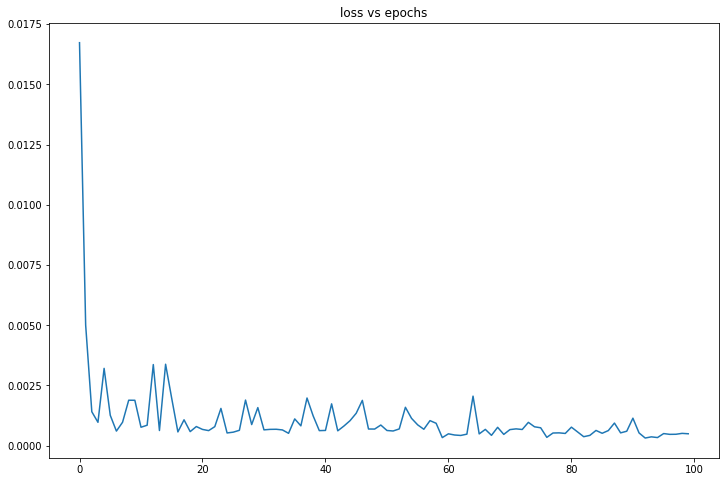

In [ ]:
pd.DataFrame(results.history)['loss'].plot(title = "loss vs epochs", figsize = (12,8))

In [ ]:
lstm_predicted_scaled = []
batch = scaled_test_data
current_batch = batch.reshape((1, n_input, n_features))
for i in range(len(test_data)):
    lstm_pred = model.predict(current_batch)[0]
    lstm_predicted_scaled.append(lstm_pred)
    current_batch = np.append(current_batch[:, 1: , :], [[lstm_pred]], axis = 1)
    # scaler.inverse_transform - Inverse the transformed o/p
prediction = pd.DataFrame(scaler.inverse_transform(lstm_predicted_scaled))
np.round(prediction)

ValueError: ignored

ValueError: ignored

**FBProphet Time Series Prediction**